# We're going to have FUN and let's find out if we can customize our own version of SGD for Linear Regression

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy import random
from sklearn.model_selection import train_test_split
import seaborn as sns
from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore")

In [2]:
boston = load_boston()

In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


## Data Preparation

In [7]:
X = boston.data
Y = boston.target
print(f'Shape of data without target data : {X.shape}')
print(f'Shape of target data : {Y.shape}')

Shape of data without target data : (506, 13)
Shape of target data : (506,)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print('Shape of x_train :', x_train.shape)
print('Shape of x_test',x_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)

Shape of x_train : (339, 13)
Shape of x_test (167, 13)
Shape of y_train (339,)
Shape of y_test (167,)


Ok. So now we're done with splitting data, we need to standardize the data before applying any algorithm to escape the effect of scales of numerical data.

In [9]:
# standardizing the data using standardscaler, the out of this will be a data, of which every column will have mean = 0 and var = 1

#fit the model using training data to avoid data leakage
scaler = StandardScaler().fit(x_train)

#transform train data and test data using trained model
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#### As now we have beautiful data, let's apply Linear Regressor model from sklearn library and visualize predicted vs actual values

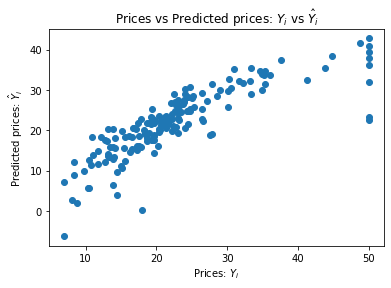

In [10]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

#we are using default parameters for linear regression
lm = LinearRegression()  
lm.fit(x_train, y_train)

Y_pred = lm.predict(x_test)

plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

As we can see, the plot is almost linear. But what is the performance???
#### We'll find out the performance using MSE(Mean Squared Error) very soon.

### Let's do some work to build a Customized Gradient Descent Model (It's Gradient Descent, Not SGD !!)

In [11]:
def customized_GD(x_train, y_train, n_iter, r):
    
    '''
    Customized Gradient Descent function.
    Inputs: train data(x_train), target data(y_train), no. of iterations to perform(n_iter), learning rate(r)
    Outputs: W and b
    
    '''
    
    #taking weight vector as zero and intercept as zero
    W = np.zeros((1, x_train.shape[1])) 
    b = 0  
    
    for i in range(n_iter):  #perform for n no. of iterations
        del_W = np.zeros((1,x_train.shape[1]))  #taking differential w.r.t W as zero vector and differential w.r.t b as zero initially
        del_b = 0                                
        for j in range(x_train.shape[0]):   #for every data point
            pred = np.dot(W, x_train[j]) + b  #calculating predictio using W, b and Xi
            del_W += (-2/x_train.shape[0])*x_train[j]*(y_train[j] - pred)  #calculating differential of loss function w.r.t W
            del_b += (-2/x_train.shape[0])*(y_train[j] - pred)  #calculating differential of loss function w.r.t b
            
        
        W = W - (r/2)*del_W  #updating vector W
        b = b - (r/2)*del_b  #updating intercept b
        r = r/2 #decreasing value of learning rate, just not to keep it constant everytime. So that it can reduce everytime,
                #rather than just bouncing back and forth on same values
    
    return W, b

### Customized Stochastic Gradient Descent

In [12]:
def customized_SGD(x_train, y_train, n_iter, k, r):
    '''
    Customized Stochastic Gradient Descent function.
    Inputs: train data(x_train), target data(y_train), no. of iterations to perform(n_iter), batch size(k), learning rate(r)
    Outputs: W and b
    
    '''
    
    
    W = np.zeros((1, x_train.shape[1]))
    b = 0
    
    for i in range(n_iter):
        train_data = pd.DataFrame(x_train)  #creating datarame of array x_train and adding target column for random sampling of datapoints for batch
        train_data['price'] = y_train
        #randomly sampled k data points
        train_data = train_data.sample(k)
        
        #alloting independent variables and target or dependent variable to different variable
        y = train_data['price'].values
        x = train_data.drop('price', axis = 1).values
        
        del_W = np.zeros((1, x.shape[1])) #below all processes are similar to Gradient Descent as above
        del_b = 0
        for j in range(k):
            pred = np.dot(W, x[j]) + b
            del_W += (-2/k)*x[j]*(y[j] - pred)
            del_b += (-2/k)*(y[j] - pred)
        
        W -= r*del_W
        b -= r*del_b
        r = r/2
    
    return W, b
        

### Customized Function for predicting values using W and b

In [13]:
def prediction(x, W, b):
    '''
    Using optimum W and b, predict values for test data points.
    
    '''
    predict = []
    
    for i in range(x.shape[0]):
        
        p = np.dot(W, x[i]) + b
        predict.append(p)
        
    return np.array(predict)
        

### Now we'll create a function to  draw a scatter plot between predicted and actual values, also find MSE(mean squared error)
To reduce the copy pasting again and again

In [14]:
def plots_MSE(y_predict, y, regressor = 'Logistic Regression'):
    '''
    Scatter plot between predicted value and actual values and  also Mean Squared Error will be printed above the chart.
    '''
    #using sklearn metric, mean squared error 
    mse = mean_squared_error(y, y_predict)
    print(f'Mean Squared Error on using {regressor} model is : {mse}')
    
    #scatter plot between predicted values and the avtual values
    plt.scatter(y, y_predict)
    
    #label y axis
    plt.ylabel('Predicted Prices')
    #label x axis
    plt.xlabel('Actual Prices')
    #giving title to the plot
    plt.title(f'Plot Between actual and predicted values using {regressor}. ')
    plt.show()

### Let's Do some plotting and find out how our Customized Gradient Descent is performing

##### Learning rate (r) = 0.1 , n_iter = 100

Mean Squared Error on using Customized Gradient Descent model is : 397.97311006231104


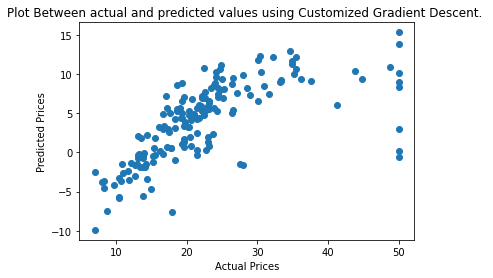

In [15]:
W, b = customized_GD(x_train, y_train, n_iter = 100, r = 0.1)

y_predicted_GD_1 = prediction(x_test, W, b)

plots_MSE(y_predicted_GD_1, y_test, regressor = 'Customized Gradient Descent')

##### Learning rate (r) = 0.5 , n_iter = 100

Mean Squared Error on using Customized Gradient Descent model is : 79.4207295607834


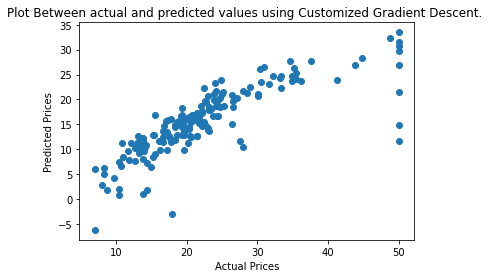

In [16]:
W, b = customized_GD(x_train, y_train, n_iter = 100, r = 0.5)


y_predicted_GD_2 = prediction(x_test, W, b)


plots_MSE(y_predicted_GD_2, y_test, regressor = 'Customized Gradient Descent')

##### Learning rate (r) = 1 , n_iter = 100

Mean Squared Error on using Customized Gradient Descent model is : 45.23895789726109


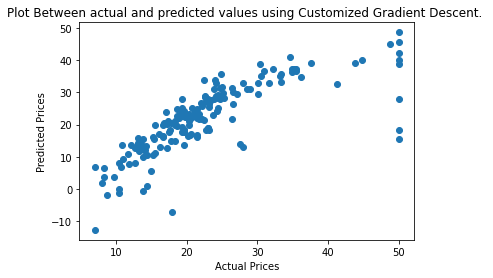

In [17]:
W, b = customized_GD(x_train, y_train, n_iter = 100, r = 1)


y_predicted_GD_3 = prediction(x_test, W, b)


plots_MSE(y_predicted_GD_3, y_test, regressor = 'Customized Gradient Descent')

##### Learning rate (r) = 1.5 , n_iter = 100

Mean Squared Error on using Customized Gradient Descent model is : 72.07899628228351


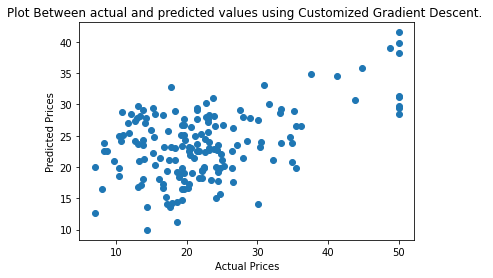

In [18]:
W, b = customized_GD(x_train, y_train, n_iter = 100, r = 1.5)


y_predicted_GD_4 = prediction(x_test, W, b)


plots_MSE(y_predicted_GD_4, y_test, regressor = 'Customized Gradient Descent')

##### Learning rate (r) = 1.3 , n_iter = 100

Mean Squared Error on using Customized Gradient Descent model is : 30.836134290461832


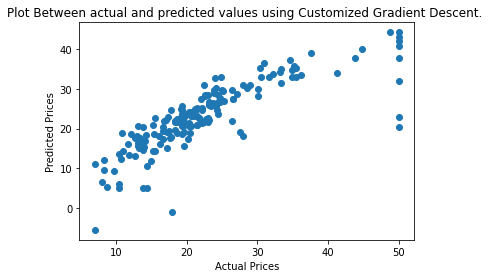

In [19]:
W, b = customized_GD(x_train, y_train, n_iter = 100, r = 1.3)


y_predicted_GD_5 = prediction(x_test, W, b)


plots_MSE(y_predicted_GD_5, y_test, regressor = 'Customized Gradient Descent')

##### Learning rate (r) = 1.34 , n_iter = 100

Mean Squared Error on using Customized Gradient Descent model is : 29.770592012498362


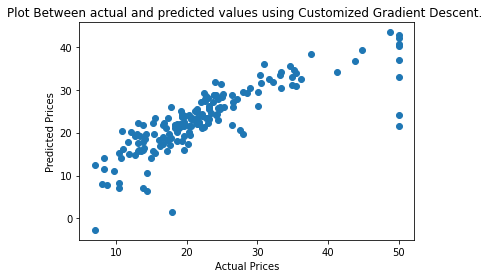

In [20]:
W, b = customized_GD(x_train, y_train, n_iter = 100, r = 1.34)


y_predicted_GD_6 = prediction(x_test, W, b)


plots_MSE(y_predicted_GD_6, y_test, regressor = 'Customized Gradient Descent')

##### Learning rate (r) = 1.34 , n_iter = 50

Mean Squared Error on using Customized Gradient Descent model is : 29.770592012498362


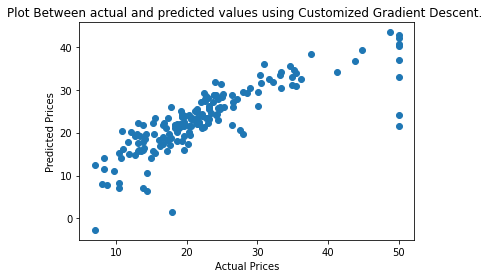

In [21]:
W, b = customized_GD(x_train, y_train, n_iter = 50, r = 1.34)


y_predicted_GD_7 = prediction(x_test, W, b)


plots_MSE(y_predicted_GD_7, y_test, regressor = 'Customized Gradient Descent')

In [22]:
mse_GD = mean_squared_error(y_test, y_predicted_GD_7)

1. You know, by experimenting I found out that n_iter = 50 and n_iter = 100 give same MSE. 
2. Also we plot a lot of graphs and found out that best learning rate = 1.34
3. We could have performed hyper-param optimization to get best learning rate and n_iter

### Now We'll perform experimentations on Customized Stochastic Gradient Descent

##### Learning rate (r) = 0.1 , n_iter = 1000 , batch_size (k) = 10

Mean Squared Error on using Customized Stochastic Gradient Descent model is : 265.4616483026165


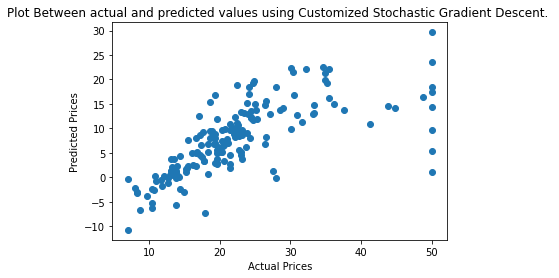

In [23]:
W, b = customized_SGD(x_train, y_train, n_iter = 1000, k = 10, r = 0.1)


y_predicted_SGD_1 = prediction(x_test, W, b)


plots_MSE(y_predicted_SGD_1, y_test, regressor = 'Customized Stochastic Gradient Descent')

##### Learning rate (r) = 0.5 , n_iter = 1000 , batch_size (k) = 10

Mean Squared Error on using Customized Stochastic Gradient Descent model is : 307.3465643442577


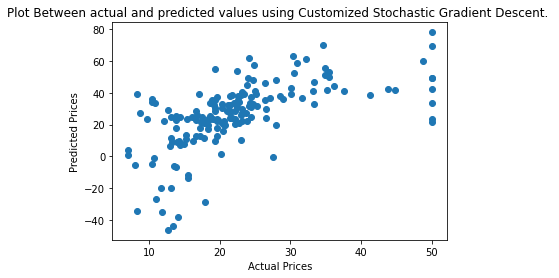

In [24]:
W, b = customized_SGD(x_train, y_train, n_iter = 1000, k = 10, r = 0.5)


y_predicted_SGD_2 = prediction(x_test, W, b)


plots_MSE(y_predicted_SGD_2, y_test, regressor = 'Customized Stochastic Gradient Descent')

##### Learning rate (r) = 0.4 , n_iter = 1000 , batch_size (k) = 10

Mean Squared Error on using Customized Stochastic Gradient Descent model is : 345.51518630009315


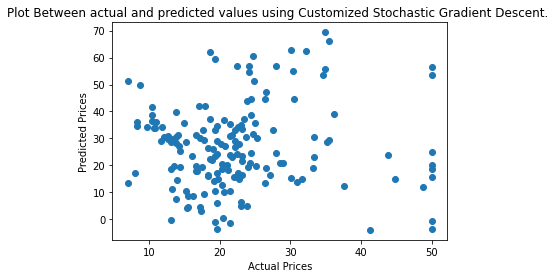

In [25]:
W, b = customized_SGD(x_train, y_train, n_iter = 1000, k = 10, r = 0.4)


y_predicted_SGD_3 = prediction(x_test, W, b)


plots_MSE(y_predicted_SGD_3, y_test, regressor = 'Customized Stochastic Gradient Descent')

##### Learning rate (r) = 0.4 , n_iter = 1000 , batch_size (k) = 50

Mean Squared Error on using Customized Stochastic Gradient Descent model is : 50.54307053793443


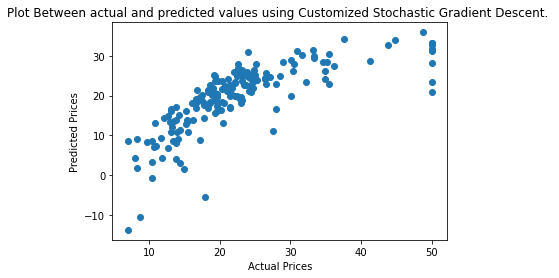

In [26]:
W, b = customized_SGD(x_train, y_train, n_iter = 1000, k = 50, r = 0.4)


y_predicted_SGD_4 = prediction(x_test, W, b)


plots_MSE(y_predicted_SGD_4, y_test, regressor = 'Customized Stochastic Gradient Descent')

##### Learning rate (r) = 0.4 , n_iter = 100 , batch_size (k) = 100

Mean Squared Error on using Customized Stochastic Gradient Descent model is : 55.70532401530075


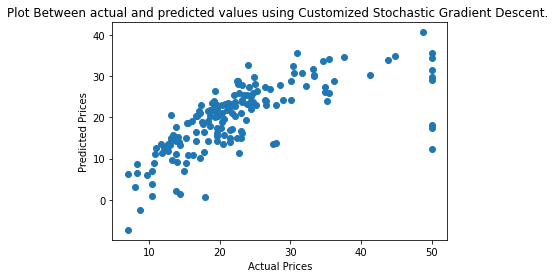

In [27]:
W, b = customized_SGD(x_train, y_train, n_iter = 1000, k = 100, r = 0.4)


y_predicted_SGD_5 = prediction(x_test, W, b)


plots_MSE(y_predicted_SGD_5, y_test, regressor = 'Customized Stochastic Gradient Descent')

##### Learning rate (r) = 0.4 , n_iter = 1000 , batch_size (k) = 200

Mean Squared Error on using Customized Stochastic Gradient Descent model is : 41.64365732918761


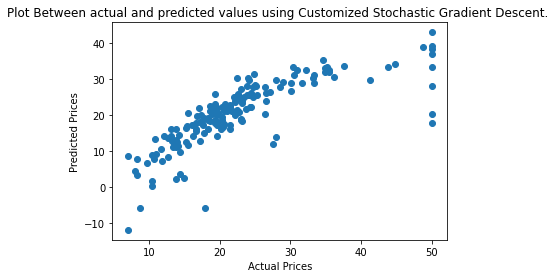

In [28]:
W, b = customized_SGD(x_train, y_train, n_iter = 1000, k = 200, r = 0.4)


y_predicted_SGD_6 = prediction(x_test, W, b)


plots_MSE(y_predicted_SGD_6, y_test, regressor = 'Customized Stochastic Gradient Descent')

##### Learning rate (r) = 0.4 , n_iter = 500 , batch_size (k) = 100

Mean Squared Error on using Customized Stochastic Gradient Descent model is : 46.60241942518976


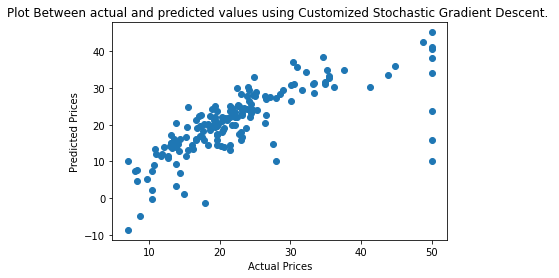

In [29]:
W, b = customized_SGD(x_train, y_train, n_iter = 500, k = 100, r = 0.4)


y_predicted_SGD_7 = prediction(x_test, W, b)


plots_MSE(y_predicted_SGD_7, y_test, regressor = 'Customized Stochastic Gradient Descent')

In [30]:
mse_SGD = mean_squared_error(y_test, y_predicted_SGD_7)

So, After a lot of experiments, come to conclusion that in SGD the values are changing everytime due random selection and also MSE is not better than out customized Gradient Descent

### Now the one provided by sklearn library: Linear Regression 

Mean Squared Error on using Logistic Regression model is : 28.530458765974597


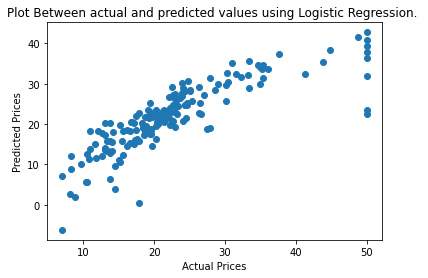

In [31]:
lm = LinearRegression()
lm.fit(x_train, y_train)

Y_predicted = lm.predict(x_test)

plots_MSE(Y_predicted, y_test)

In [32]:
mse_LR = mean_squared_error(y_test, Y_predicted)

In [33]:
x = PrettyTable() #pretty table function
x.field_names = ['Model', 'MSE' ] # set the column/header names

# rows are added to the table
x.add_row(['Customized Gradient Descent', mse_GD]) 
x.add_row(['Customized Stochastic Gradient Descent', mse_SGD])
x.add_row(['Linear Regression', mse_LR])

print(x)

+----------------------------------------+--------------------+
|                 Model                  |        MSE         |
+----------------------------------------+--------------------+
|      Customized Gradient Descent       | 29.770592012498362 |
| Customized Stochastic Gradient Descent | 46.60241942518976  |
|           Linear Regression            | 28.530458765974597 |
+----------------------------------------+--------------------+
